In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join, dirname, abspath

from sklearn.preprocessing import StandardScaler, scale, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import hdbscan
import warnings



In [25]:
SPECIES = ['PJ', 'BV', 'AC', 'DP', 'BT', 'DL', 'BH', 'BP', 'CS', 'EL']
FOLDER = join('Data', 'Species')
def load_growth_data(filename):
    """Load growth data from a CSV file."""
    data = pd.read_csv(join(FOLDER, filename))
    data_growth = (data[data['Time'] == 24][SPECIES].values - data[data['Time'] == 0][SPECIES].values )
    
    growth_df = pd.DataFrame(data_growth, columns=SPECIES)
    growth_df['Treatments'] = data[data['Time'] == 24]['Treatments'].values
    growth_df = growth_df.reset_index(drop=True)
    return growth_df

data_non_scaled = load_growth_data('growth_profile_all.csv')

In [26]:
data_non_scaled

,PJ,BV,AC,DP,BT,DL,BH,BP,CS,EL,Treatments
0,0.003724,0.196078,0.183944,0.448211,0.062132,0.696451,0.055866,0.046191,0.005828,0.065757,Inulin
1,0.002106,0.065855,0.199391,0.474670,0.045631,0.770538,0.063348,0.083587,0.004895,0.109176,Inulin
2,0.001673,0.076443,0.247271,0.398965,0.076639,0.802188,0.012637,0.042206,0.004290,0.079048,Inulin
3,0.001256,0.101921,0.208160,0.413006,0.106440,0.640984,0.019463,0.038375,0.004913,0.117527,Inulin
4,0.000191,0.492097,0.139730,0.361517,0.026856,0.718147,0.063573,0.002107,0.006184,0.115641,Inulin
...,...,...,...,...,...,...,...,...,...,...,...
318,0.000000,0.204577,0.001275,0.000000,0.175936,0.066432,0.000000,0.000000,0.000000,0.000000,Xylan
319,0.000000,0.257250,-0.001023,0.303211,0.000000,0.066612,0.026547,0.016615,0.004261,0.224394,Xylan
320,0.065944,0.000000,-0.000310,0.477206,0.000000,0.000000,0.015235,0.051420,0.006205,0.105500,Xylan
321,0.057380,0.000000,0.000000,0.384680,0.000000,0.082534,0.024513,0.048725,0.004495,0.187006,Xylan


In [27]:
min_max_scaler = MinMaxScaler()
data_norm = pd.DataFrame(min_max_scaler.fit_transform(data_non_scaled.drop(columns=['Treatments'])), columns=data_non_scaled.columns[:-1])
data_norm

,PJ,BV,AC,DP,BT,DL,BH,BP,CS,EL
0,0.004542,0.123499,0.144415,0.497765,0.033490,0.211815,0.087818,0.045662,0.008969,0.059365
1,0.003135,0.044274,0.156132,0.526806,0.024783,0.234225,0.099075,0.080765,0.007533,0.095413
2,0.002759,0.050716,0.192451,0.443713,0.041145,0.243798,0.022775,0.041922,0.006602,0.070400
3,0.002396,0.066216,0.162784,0.459125,0.056870,0.195038,0.033046,0.038325,0.007561,0.102347
4,0.001470,0.303591,0.110876,0.402610,0.014876,0.218378,0.099414,0.004281,0.009517,0.100781
...,...,...,...,...,...,...,...,...,...,...
318,0.001304,0.128670,0.005852,0.005810,0.093540,0.021252,0.003761,0.002304,0.000000,0.004772
319,0.001304,0.160715,0.004109,0.338614,0.000705,0.021307,0.043704,0.017899,0.006557,0.191072
320,0.058636,0.004210,0.004650,0.529590,0.000705,0.001158,0.026683,0.050571,0.009550,0.092362
321,0.051190,0.004210,0.004885,0.428034,0.000705,0.026123,0.040644,0.048041,0.006917,0.160031


In [68]:
pca = PCA(n_components=2)
pca = pca.fit_transform(data_norm)
pc1 = pca[:, 0]
pc2 = pca[:, 1]
pca.shape

(323, 2)

## K-means

In [29]:
warnings.filterwarnings('ignore')
n_kmeans = [2, 4, 5, 6, 7, 8, 9, 10]
clusters_kmeans = pd.DataFrame()
df_clusters_kmeans = data_non_scaled.copy()  # Copia el dataframe original para agregar los clusters
for n in n_kmeans:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(data_norm)
    clusters_kmeans['cluster_' + str(n)] = kmeans.fit_predict(data_norm)
    score_kmeans = silhouette_score(data_norm, kmeans.labels_)
    in_score = kmeans.inertia_
    print(f'KMeans with {n} clusters: Silhouette Score = {score_kmeans:.3f}, Inertia = {in_score:.3f}')
    df_clusters_kmeans['cluster_' + str(n)] = kmeans.labels_  # Agrega los clusters al dataframe original


df_clusters_kmeans
clusters_kmeans


KMeans with 2 clusters: Silhouette Score = 0.412, Inertia = 53.554
KMeans with 4 clusters: Silhouette Score = 0.254, Inertia = 39.867
KMeans with 5 clusters: Silhouette Score = 0.293, Inertia = 32.419
KMeans with 6 clusters: Silhouette Score = 0.293, Inertia = 30.039
KMeans with 7 clusters: Silhouette Score = 0.305, Inertia = 27.208
KMeans with 8 clusters: Silhouette Score = 0.321, Inertia = 23.879
KMeans with 9 clusters: Silhouette Score = 0.328, Inertia = 21.102
KMeans with 10 clusters: Silhouette Score = 0.300, Inertia = 20.320


,cluster_2,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
0,0,3,3,3,3,3,3,3
1,0,3,3,3,3,3,3,3
2,0,3,3,3,3,3,3,3
3,0,3,3,3,3,3,3,3
4,0,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...
318,0,0,4,4,4,2,2,2
319,0,3,3,3,3,3,3,3
320,0,3,3,3,3,3,3,3
321,0,3,3,3,3,3,3,3


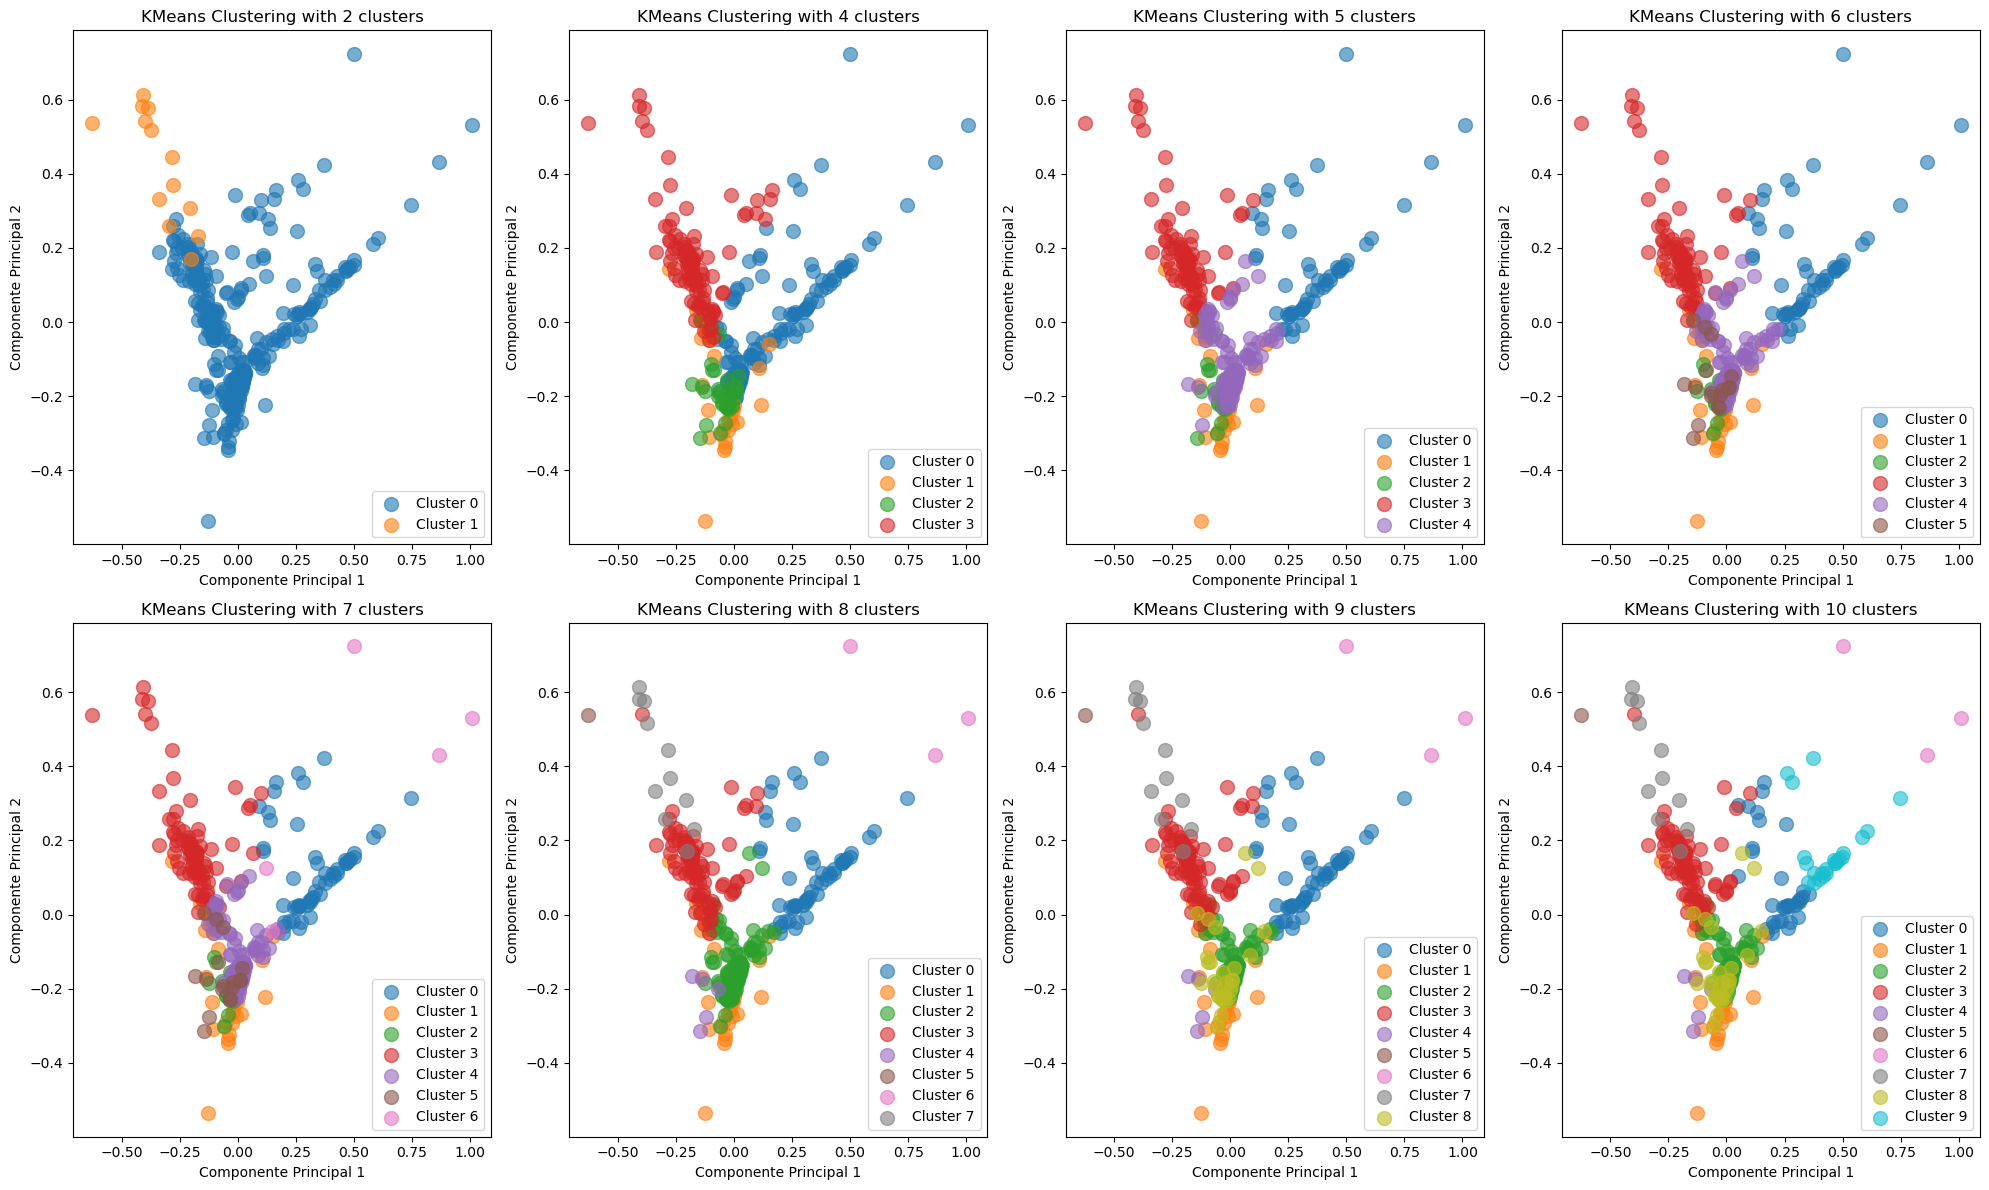

In [30]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))  
axs = axs.flatten()

for i, n in enumerate(n_kmeans):
    cluster = df_clusters_kmeans['cluster_' + str(n)] 
    for j in np.unique(cluster):
        axs[i].scatter(pc1[cluster == j], pc2[cluster == j], label=f'Cluster {j}', alpha=0.6, s=100)
    
    axs[i].set_title(f'KMeans Clustering with {n} clusters')
    axs[i].set_xlabel('Componente Principal 1')
    axs[i].set_ylabel('Componente Principal 2')
    axs[i].legend(loc='lower right')

plt.tight_layout()
plt.show()

## HDBSCAN

In [50]:
n_hdbscan = [2, 4, 5, 6, 7, 8, 9, 10]
clusters_hdbscan = pd.DataFrame()
df_clusters_hbdscan = data_non_scaled.copy()  # Copia el dataframe original para agregar los clusters
for n in n_hdbscan:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=n, gen_min_span_tree=True)
    clusterer.fit(data_norm)
    clusters_hdbscan['cluster_' + str(n)] = clusterer.fit_predict(data_norm)
    score_hdbscaan = silhouette_score(data_norm, clusterer.fit_predict(data_norm))
    print(f'KMeans with {n} clusters: Silhouette Score = {score_kmeans:.3f}')
    df_clusters_hbdscan['cluster_' + str(n)] = clusterer.fit_predict(data_norm) # Agrega los clusters al dataframe original


df_clusters_hbdscan
# clusters_hdbscan

KMeans with 2 clusters: Silhouette Score = 0.300
KMeans with 4 clusters: Silhouette Score = 0.300
KMeans with 5 clusters: Silhouette Score = 0.300
KMeans with 6 clusters: Silhouette Score = 0.300
KMeans with 7 clusters: Silhouette Score = 0.300
KMeans with 8 clusters: Silhouette Score = 0.300
KMeans with 9 clusters: Silhouette Score = 0.300
KMeans with 10 clusters: Silhouette Score = 0.300


,PJ,BV,AC,DP,BT,DL,BH,BP,CS,EL,Treatments,cluster_2,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
0,0.003724,0.196078,0.183944,0.448211,0.062132,0.696451,0.055866,0.046191,0.005828,0.065757,Inulin,5,1,0,0,0,0,-1,-1
1,0.002106,0.065855,0.199391,0.474670,0.045631,0.770538,0.063348,0.083587,0.004895,0.109176,Inulin,5,1,0,0,0,0,-1,-1
2,0.001673,0.076443,0.247271,0.398965,0.076639,0.802188,0.012637,0.042206,0.004290,0.079048,Inulin,5,1,0,0,0,0,-1,-1
3,0.001256,0.101921,0.208160,0.413006,0.106440,0.640984,0.019463,0.038375,0.004913,0.117527,Inulin,5,1,0,0,0,0,-1,-1
4,0.000191,0.492097,0.139730,0.361517,0.026856,0.718147,0.063573,0.002107,0.006184,0.115641,Inulin,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.000000,0.204577,0.001275,0.000000,0.175936,0.066432,0.000000,0.000000,0.000000,0.000000,Xylan,30,10,5,5,5,2,1,1
319,0.000000,0.257250,-0.001023,0.303211,0.000000,0.066612,0.026547,0.016615,0.004261,0.224394,Xylan,-1,7,-1,-1,-1,2,1,1
320,0.065944,0.000000,-0.000310,0.477206,0.000000,0.000000,0.015235,0.051420,0.006205,0.105500,Xylan,-1,-1,-1,-1,-1,2,1,1
321,0.057380,0.000000,0.000000,0.384680,0.000000,0.082534,0.024513,0.048725,0.004495,0.187006,Xylan,-1,-1,-1,-1,-1,2,1,1


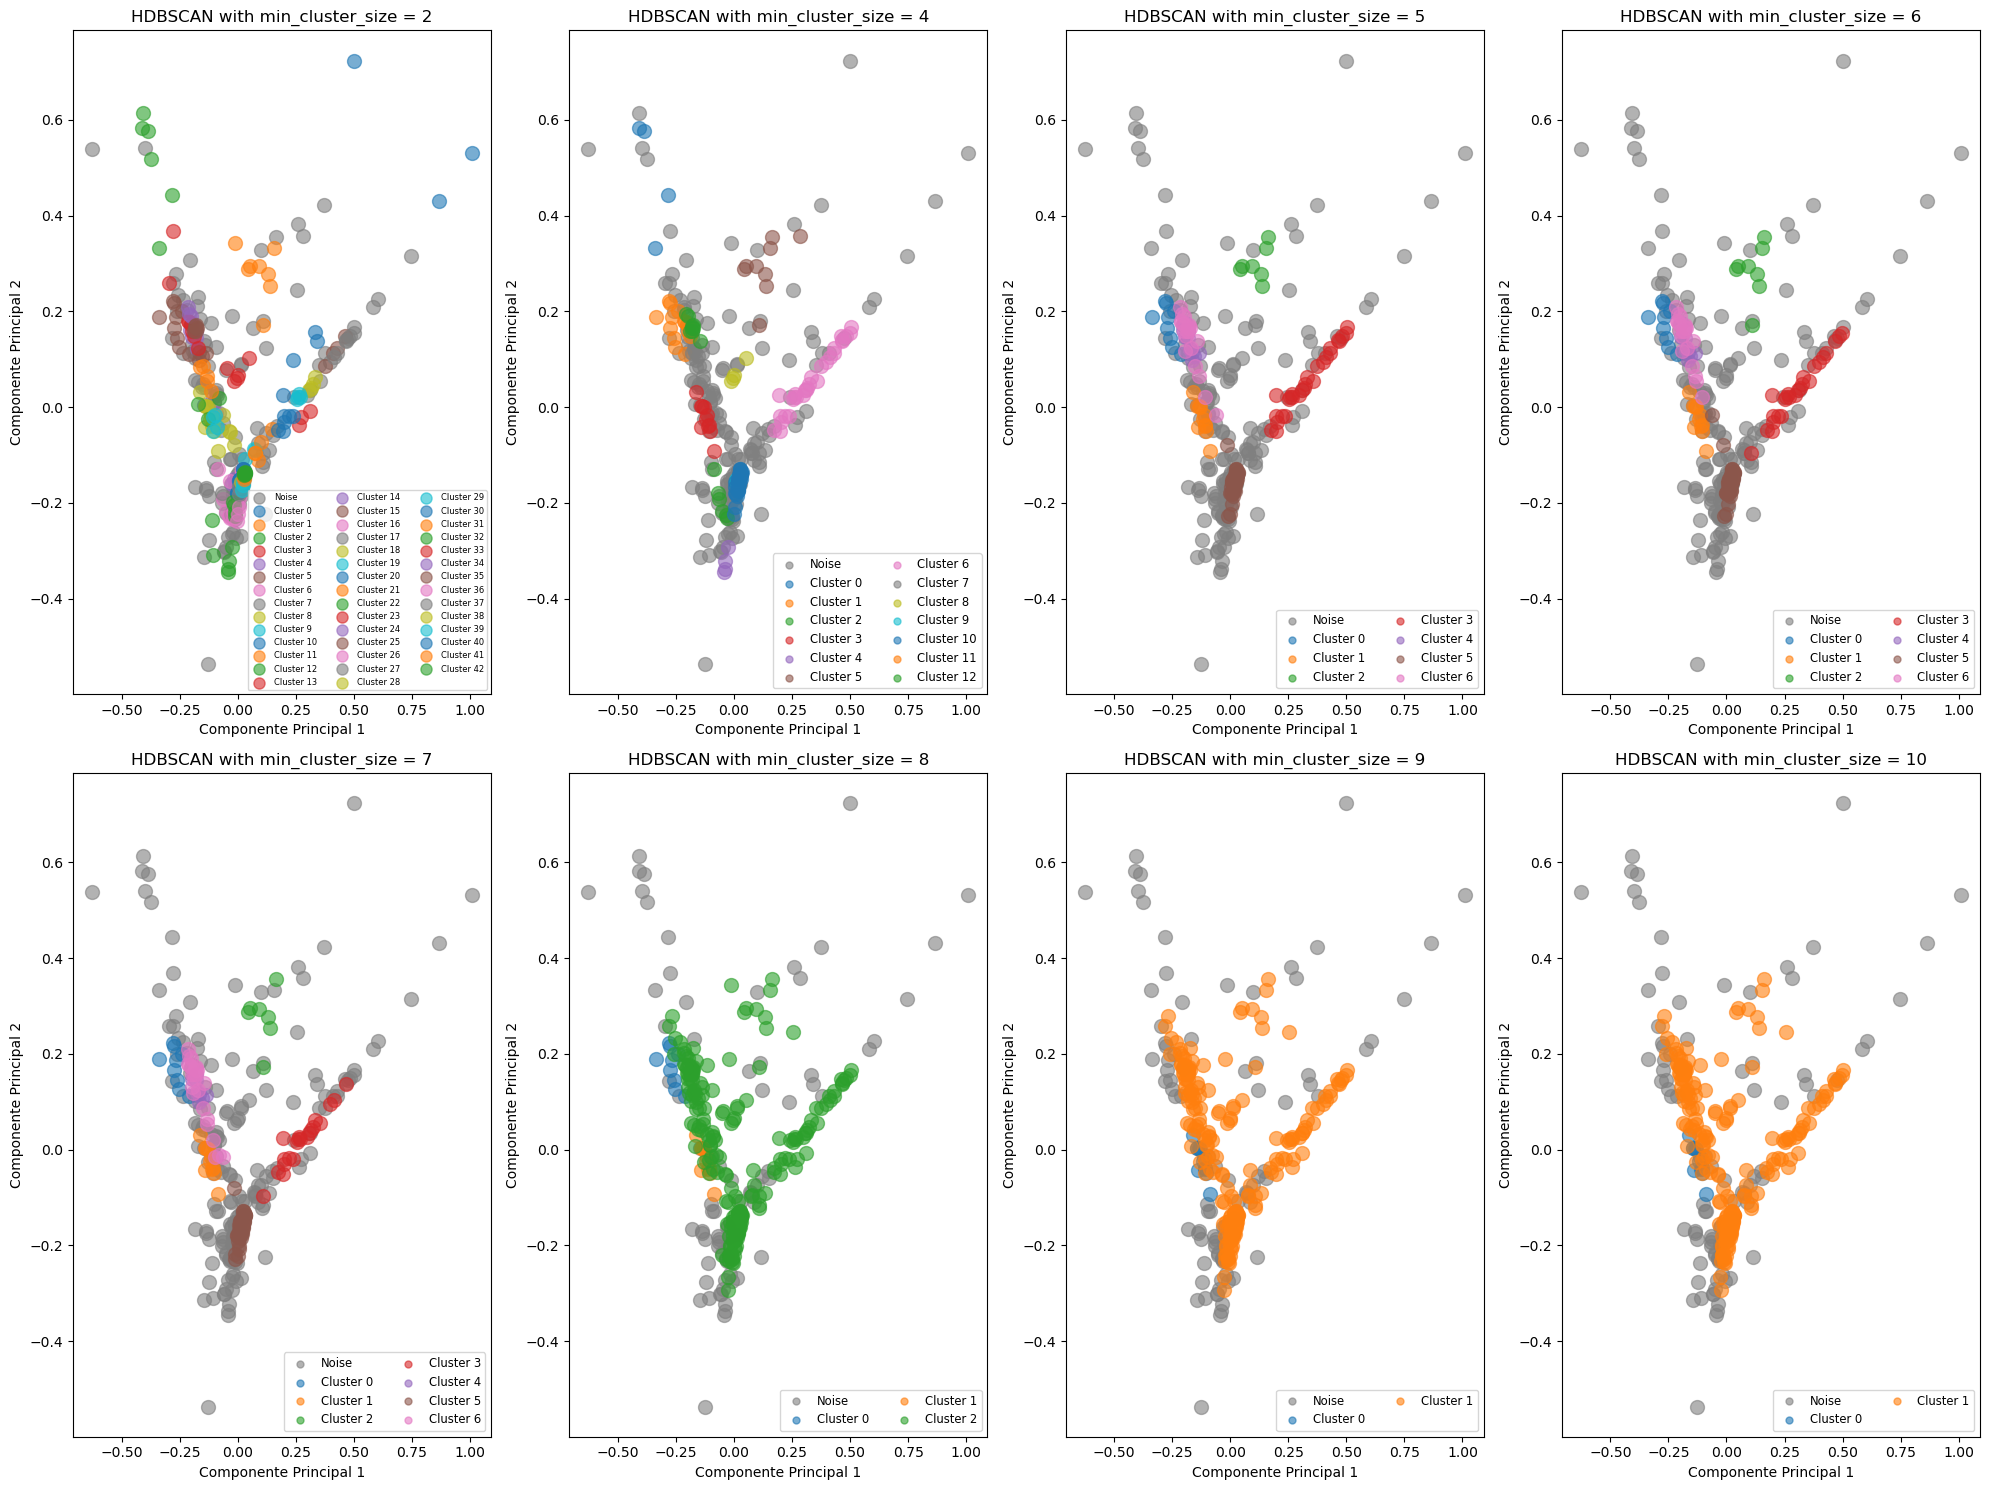

In [51]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 15))  
axs = axs.flatten()

for i, n in enumerate(n_hdbscan):
    cluster = df_clusters_hbdscan['cluster_' + str(n)] 
    for j in np.unique(cluster):
        if j != -1: 
            axs[i].scatter(pc1[cluster == j], pc2[cluster == j], label=f'Cluster {j}', alpha=0.6, s=100)
        else:
            axs[i].scatter(pc1[cluster == j], pc2[cluster == j], label='Noise', alpha=0.6, s=100, color='gray')

    axs[i].set_title(f'HDBSCAN with min_cluster_size = {n}')
    axs[i].set_xlabel('Componente Principal 1')
    axs[i].set_ylabel('Componente Principal 2')
    if np.unique(cluster).size > 15:
        axs[i].legend(loc='lower right', fontsize=6, markerscale=0.8, ncol=3)
    else:
        axs[i].legend(loc='lower right', fontsize='small', markerscale=0.5, ncol=2)

plt.tight_layout()
plt.show()

In [52]:
df_clusters_hbdscan['Treatments'].unique()

array(['Inulin', 'Laminarin', 'No Carb', 'Xylan'], dtype=object)

In [64]:
df_clusters_hbdscan[df_clusters_hbdscan['Treatments'] == 'Inulin']['cluster_2']

0      5
1      5
2      5
3      5
4     -1
      ..
79     6
80     4
81    -1
82     8
83    16
Name: cluster_2, Length: 84, dtype: int64

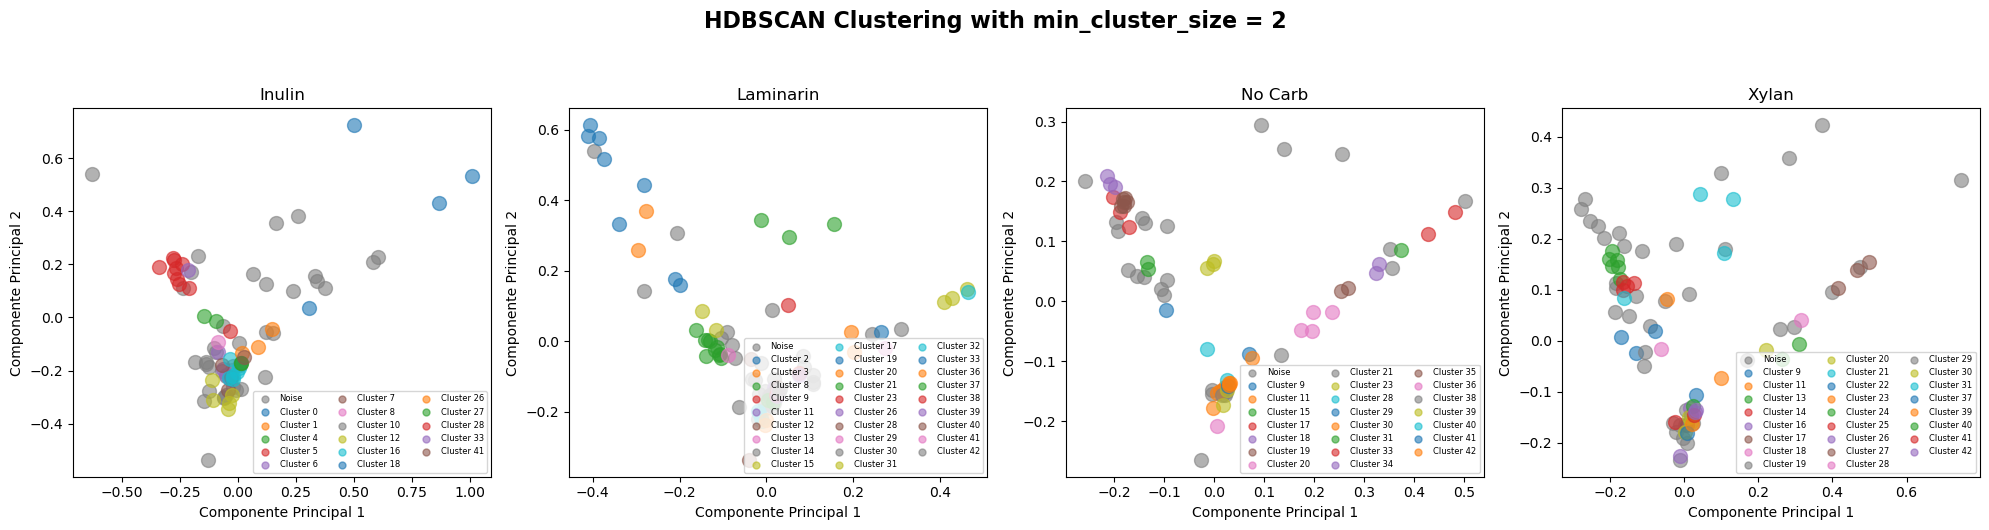

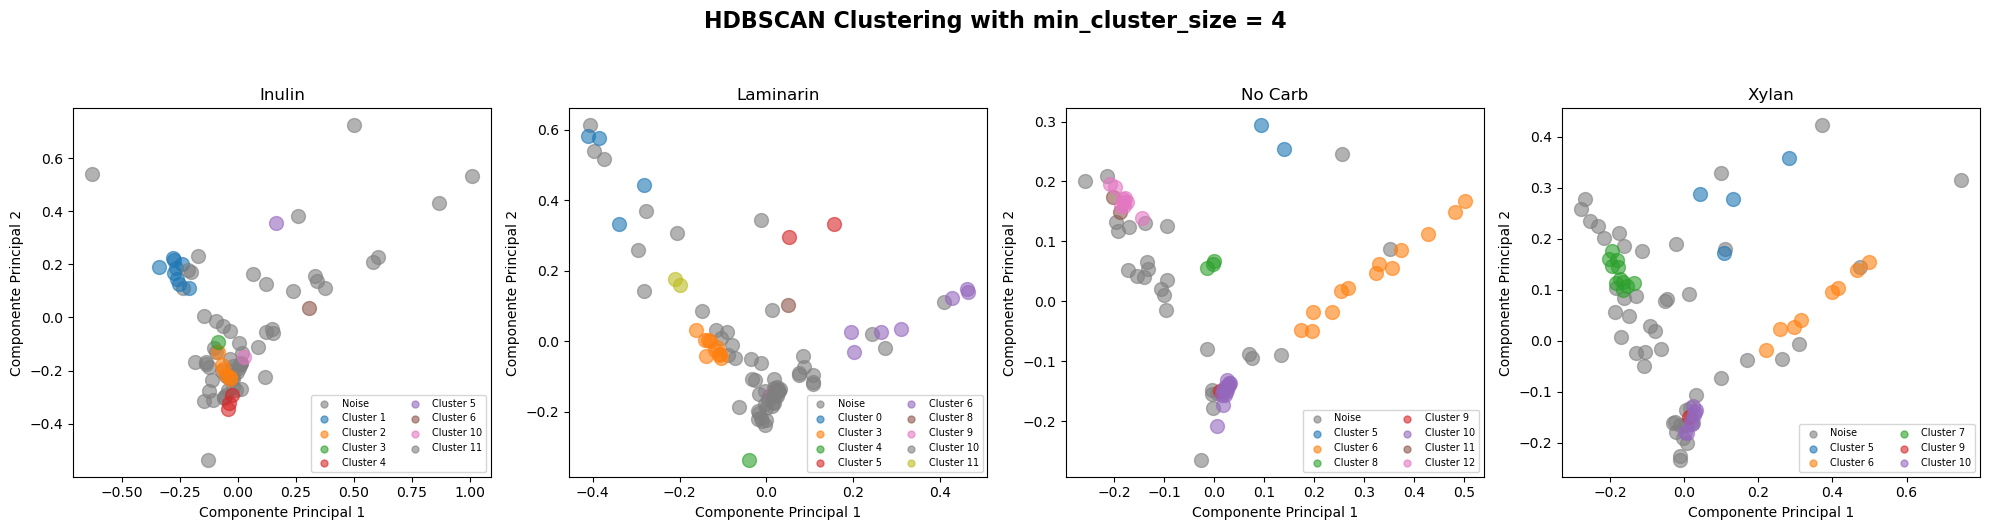

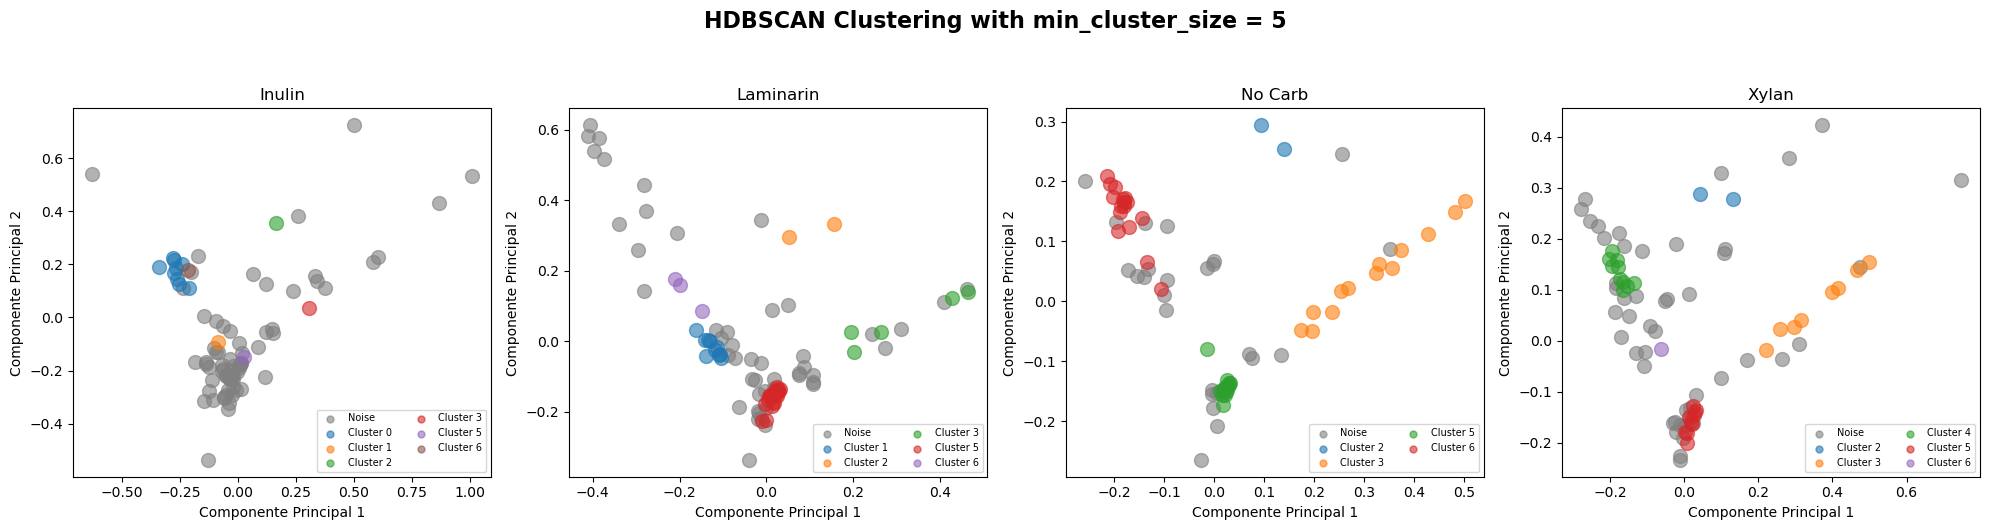

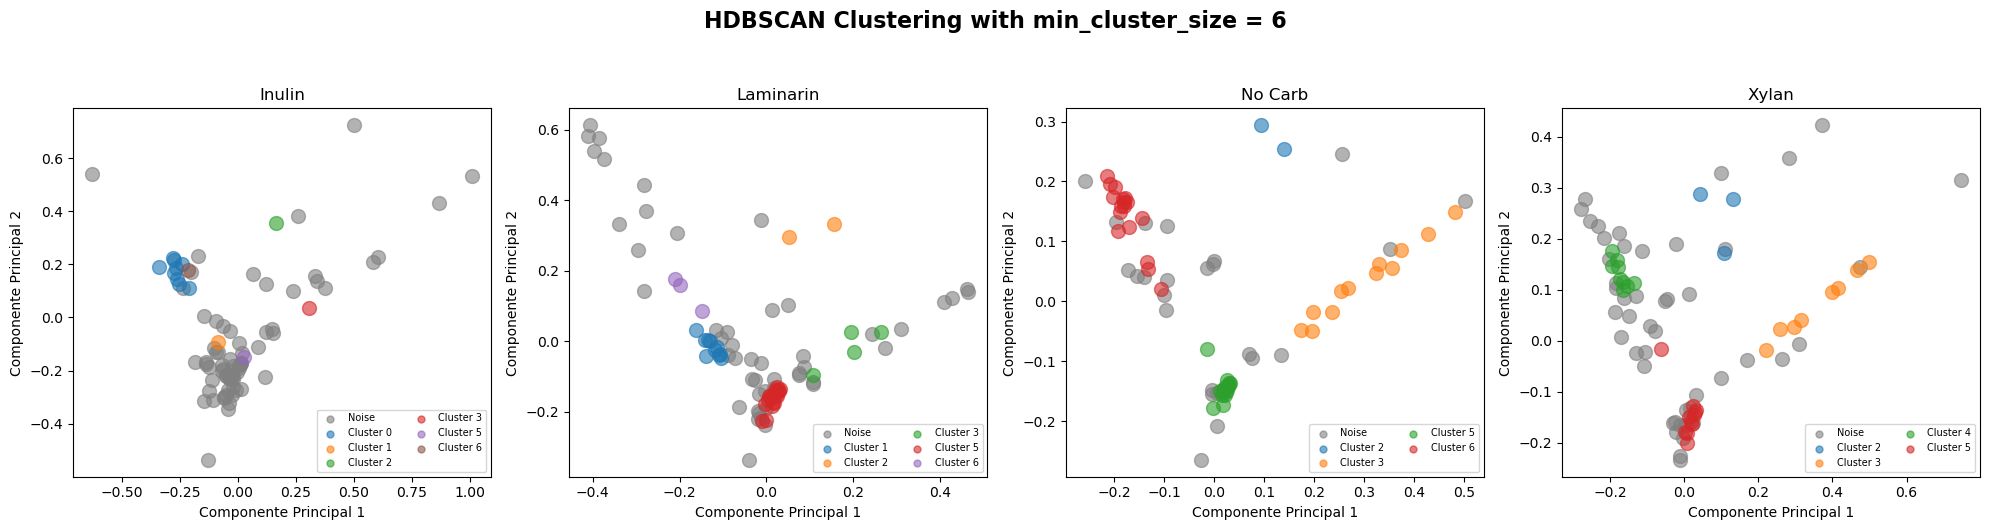

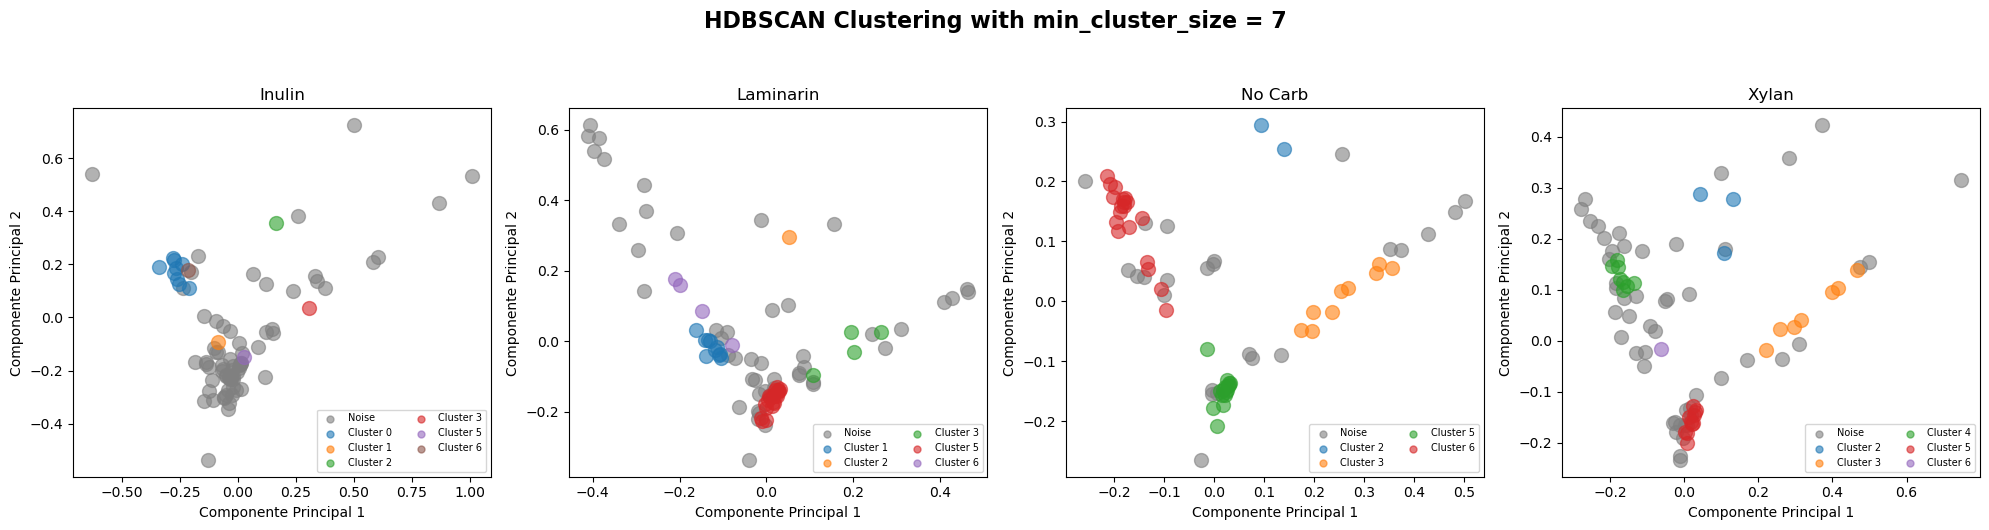

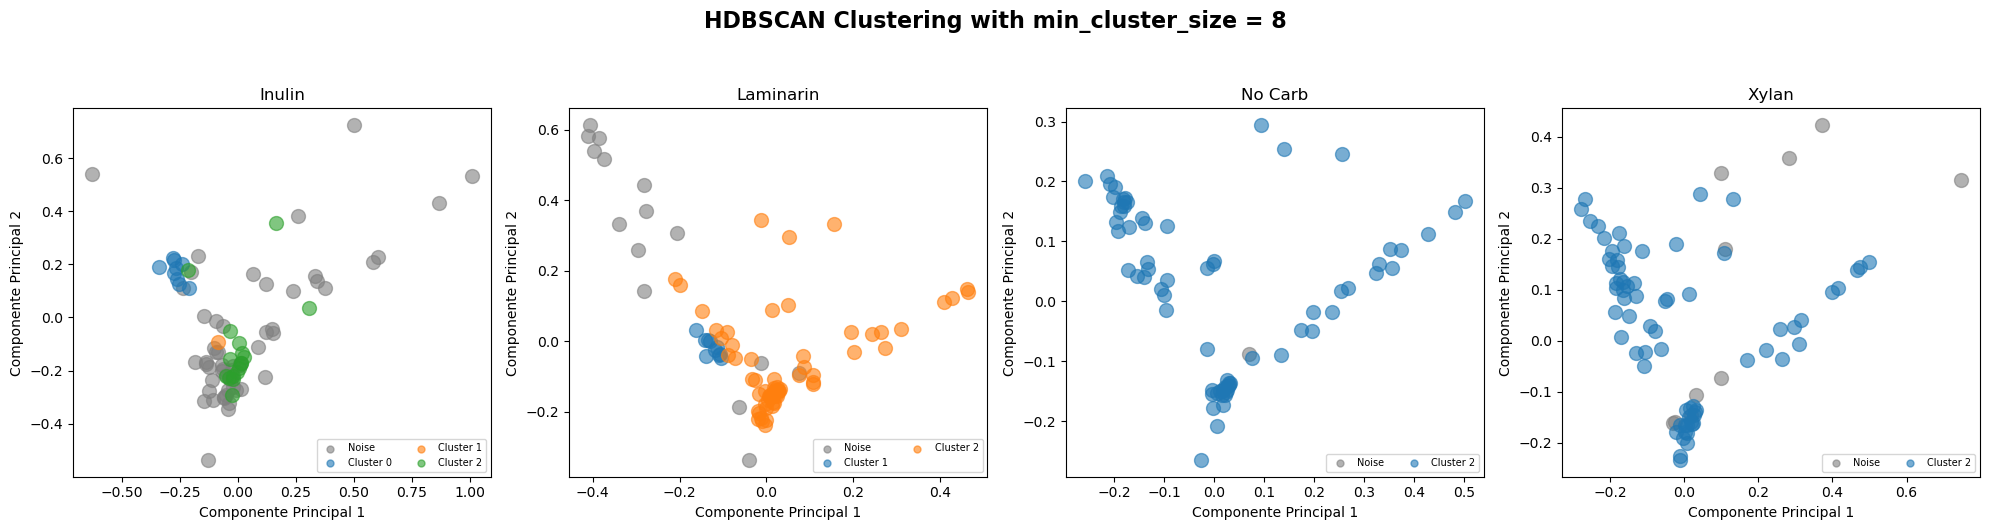

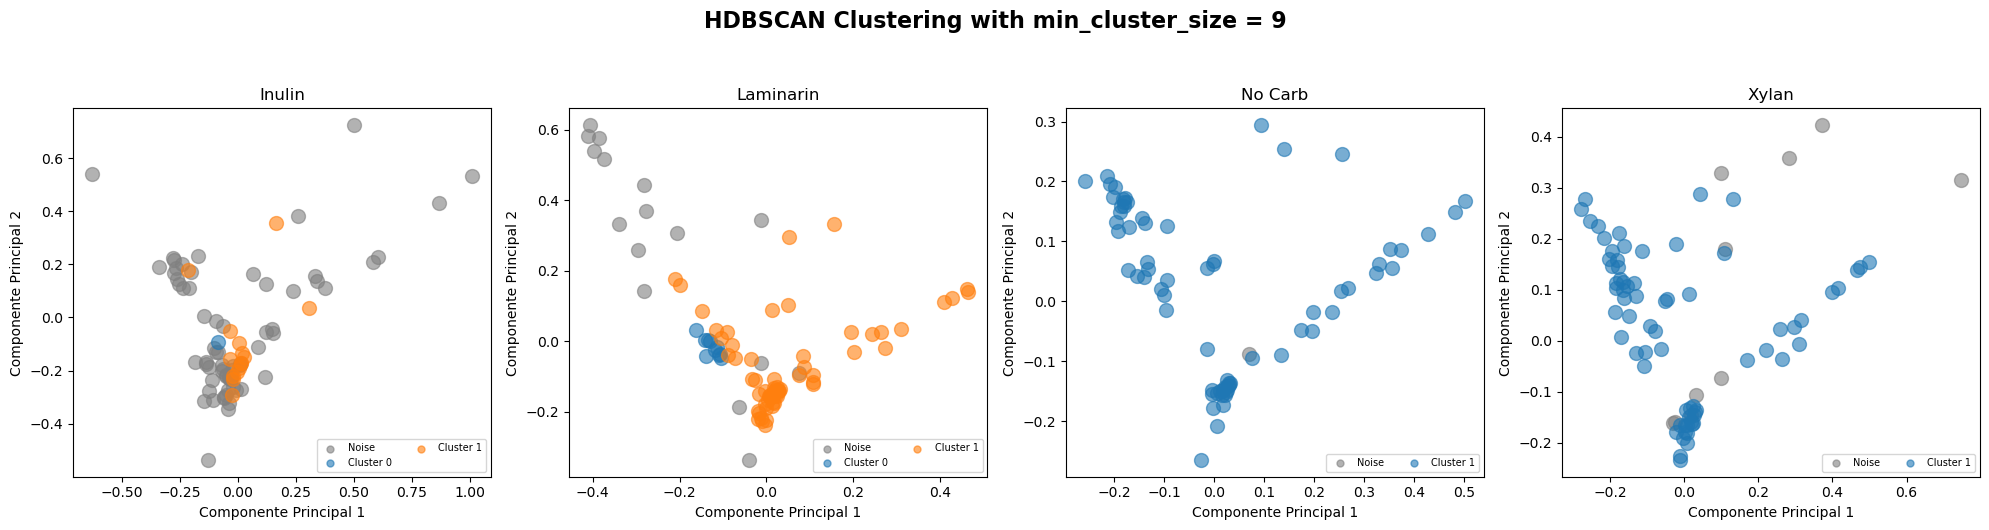

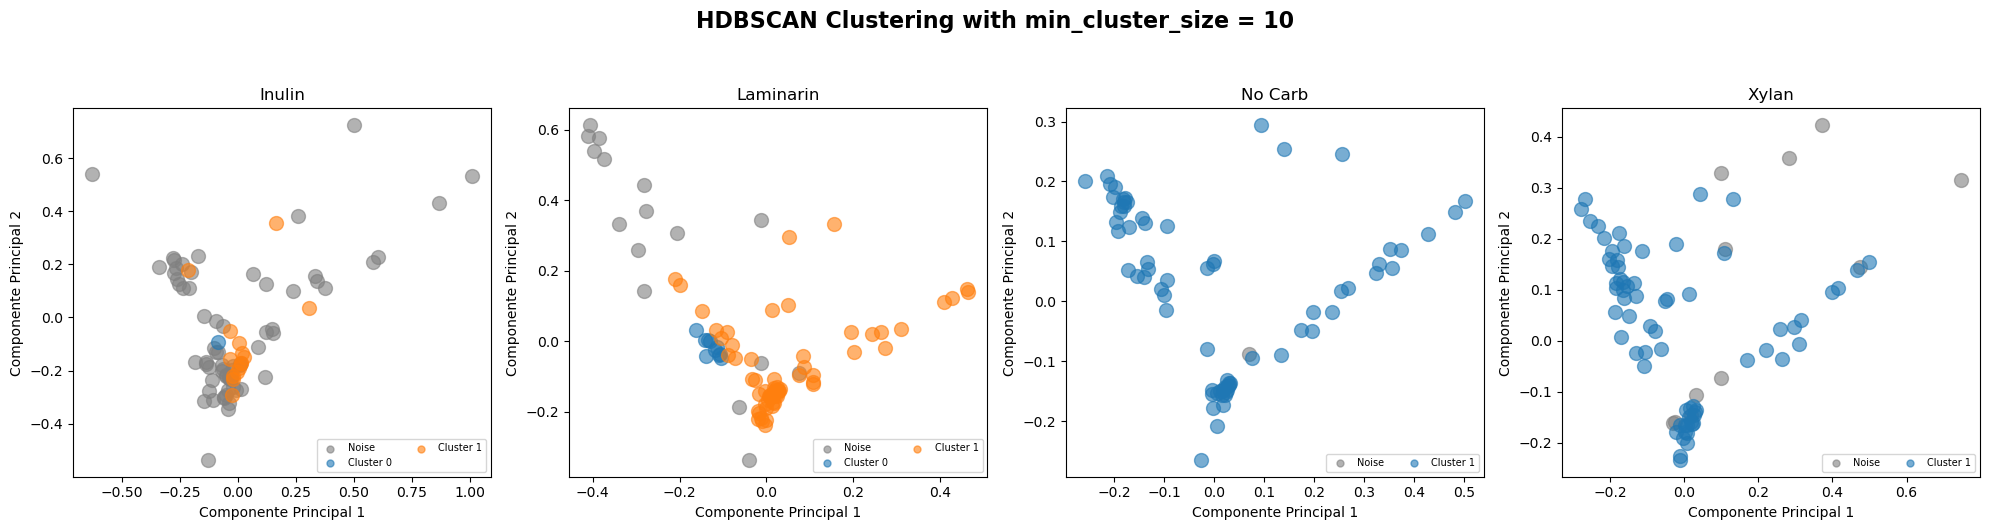

In [75]:
t = ['Inulin', 'Laminarin', 'No Carb', 'Xylan']

for i, n in enumerate(n_hdbscan):
    
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5)) 
    axs = axs.flatten()
    fig.suptitle(f'HDBSCAN Clustering with min_cluster_size = {n}', fontsize=16, fontweight='bold', y=1.05)

    for j, treatment in enumerate(t):
        cluster = df_clusters_hbdscan[df_clusters_hbdscan['Treatments'] == treatment]['cluster_' + str(n)] 
        
        pc1 = pca[df_clusters_hbdscan['Treatments'] == treatment][:, 0]
        pc2 = pca[df_clusters_hbdscan['Treatments'] == treatment][:, 1]
        
        for k in np.unique(cluster):
            if k != -1:  # Ignore noise points (-1)
                axs[j].scatter(pc1[cluster == k], pc2[cluster == k], label=f'Cluster {k}', alpha=0.6, s=100)
            else:
                axs[j].scatter(pc1[cluster == k], pc2[cluster == k], label='Noise', alpha=0.6, s=100, color='gray')
        
        axs[j].set_title(f'{treatment}')
        axs[j].set_xlabel('Componente Principal 1')
        axs[j].set_ylabel('Componente Principal 2')
        if np.unique(cluster).size > 15:
            axs[j].legend(loc='lower right', fontsize=6, markerscale=0.5, ncol=3)
        else:
            axs[j].legend(loc='lower right', fontsize=7, markerscale=0.5, ncol=2)

    plt.tight_layout()
    plt.show()


## DBSCAN

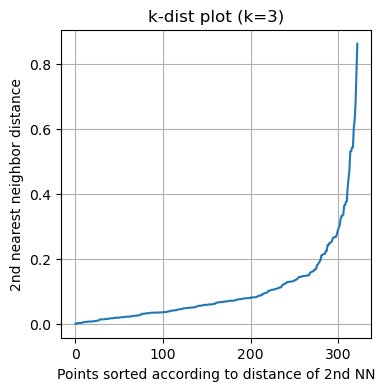

In [20]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(data_norm)
distances, indices = neighbors_fit.kneighbors(data_norm)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(4, 4))
plt.xlabel("Points sorted according to distance of 2nd NN")
plt.ylabel("2nd nearest neighbor distance")
plt.title("k-dist plot (k=3)")
plt.plot(distances)
plt.grid(True)
plt.show()

In [21]:
n_dbscan = [0.38, 0.39, 0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60]

clusters_dbscan = pd.DataFrame()
df_clusters_dbscan = data_non_scaled.copy() 
for n in n_dbscan:
    dbscan = DBSCAN(eps=n)
    model = dbscan.fit(data_norm)
    clusters_dbscan['cluster_' + str(n)] = model.labels_
    score_dbscan = silhouette_score(data_norm, model.labels_)
    print(f'DBSCAN with {n}: Silhouette Score = {score_dbscan:.3f}')
    df_clusters_dbscan['cluster_' + str(n)] = kmeans.labels_ 

df_clusters_dbscan
clusters_dbscan

DBSCAN with 0.38: Silhouette Score = 0.505
DBSCAN with 0.39: Silhouette Score = 0.505
DBSCAN with 0.4: Silhouette Score = 0.505
DBSCAN with 0.41: Silhouette Score = 0.505
DBSCAN with 0.42: Silhouette Score = 0.505
DBSCAN with 0.43: Silhouette Score = 0.524
DBSCAN with 0.44: Silhouette Score = 0.524
DBSCAN with 0.45: Silhouette Score = 0.542
DBSCAN with 0.46: Silhouette Score = 0.556
DBSCAN with 0.47: Silhouette Score = 0.566
DBSCAN with 0.48: Silhouette Score = 0.577
DBSCAN with 0.49: Silhouette Score = 0.577
DBSCAN with 0.5: Silhouette Score = 0.577
DBSCAN with 0.51: Silhouette Score = 0.577
DBSCAN with 0.52: Silhouette Score = 0.577
DBSCAN with 0.53: Silhouette Score = 0.577
DBSCAN with 0.54: Silhouette Score = 0.577
DBSCAN with 0.55: Silhouette Score = 0.577
DBSCAN with 0.56: Silhouette Score = 0.587
DBSCAN with 0.57: Silhouette Score = 0.587
DBSCAN with 0.58: Silhouette Score = 0.583
DBSCAN with 0.59: Silhouette Score = 0.583
DBSCAN with 0.6: Silhouette Score = 0.583


,cluster_0.38,cluster_0.39,cluster_0.4,cluster_0.41,cluster_0.42,cluster_0.43,cluster_0.44,cluster_0.45,cluster_0.46,cluster_0.47,...,cluster_0.51,cluster_0.52,cluster_0.53,cluster_0.54,cluster_0.55,cluster_0.56,cluster_0.57,cluster_0.58,cluster_0.59,cluster_0.6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


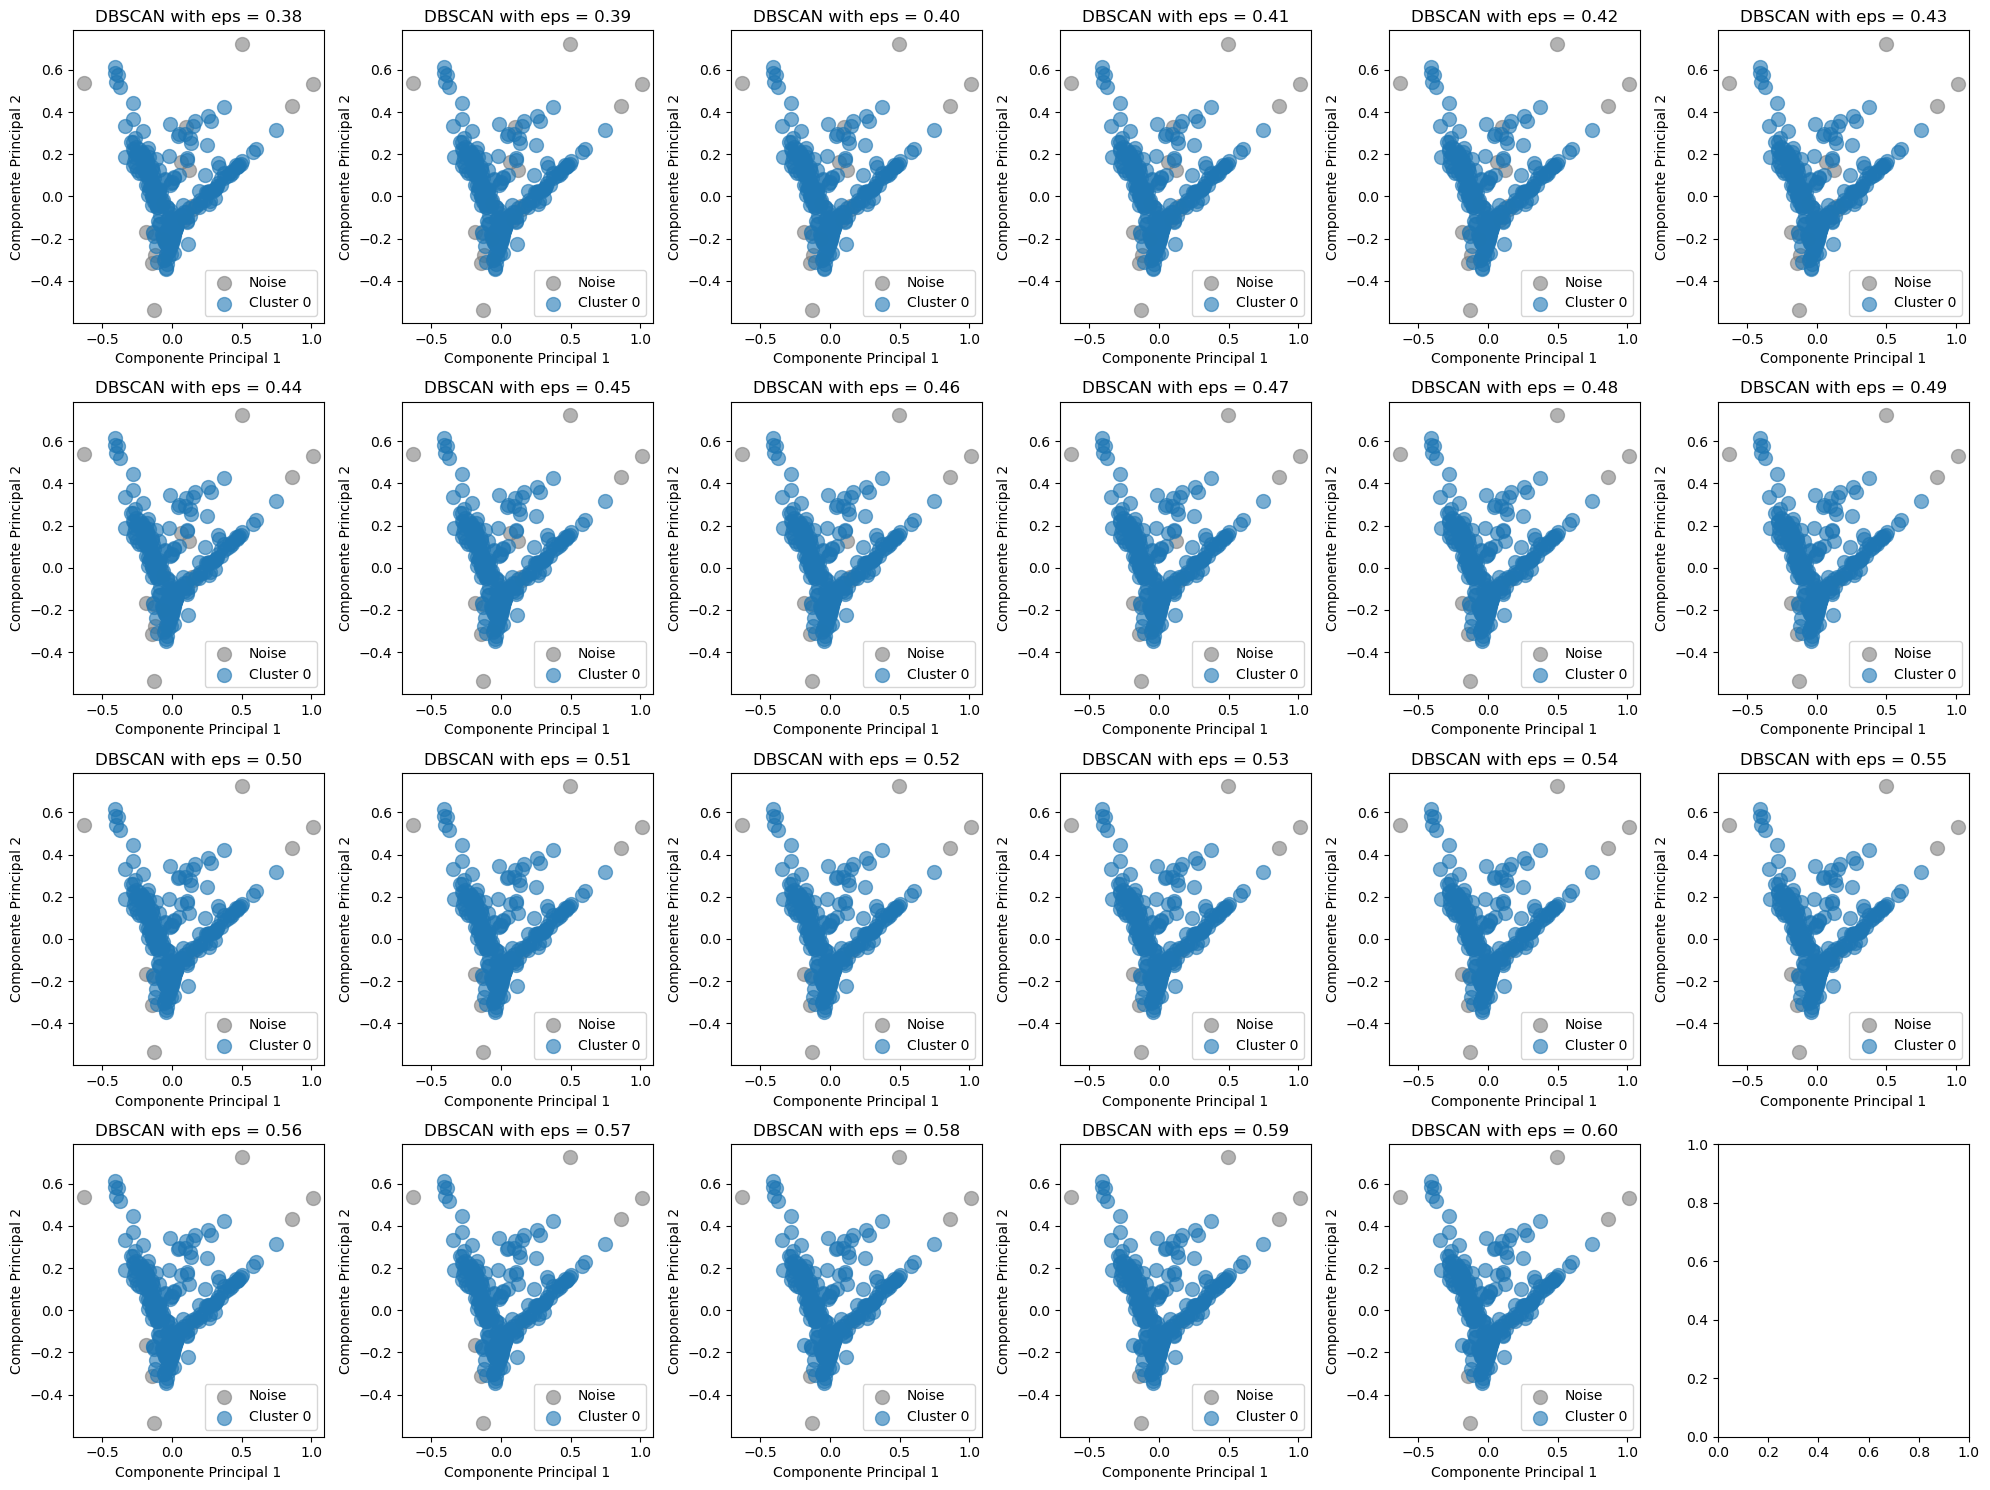

In [22]:
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 15))  
axs = axs.flatten()

for i, eps in enumerate(n_dbscan):
    dbscan = DBSCAN(eps=eps)
    model = dbscan.fit(data_norm)
    
    cluster = model.labels_

    for j in np.unique(cluster):
        if j != -1:
            axs[i].scatter(pc1[cluster == j], pc2[cluster == j], label=f'Cluster {j}', alpha=0.6, s=100)
        else:
            axs[i].scatter(pc1[cluster == j], pc2[cluster == j], label=f'Noise', alpha=0.6, s=100, color='gray')
    
    axs[i].set_title(f'DBSCAN with eps = {eps:.2f}')
    axs[i].set_xlabel('Componente Principal 1')
    axs[i].set_ylabel('Componente Principal 2')
    axs[i].legend()

plt.tight_layout()
plt.show()

## GMM

Text(0, 0.5, 'AIC')

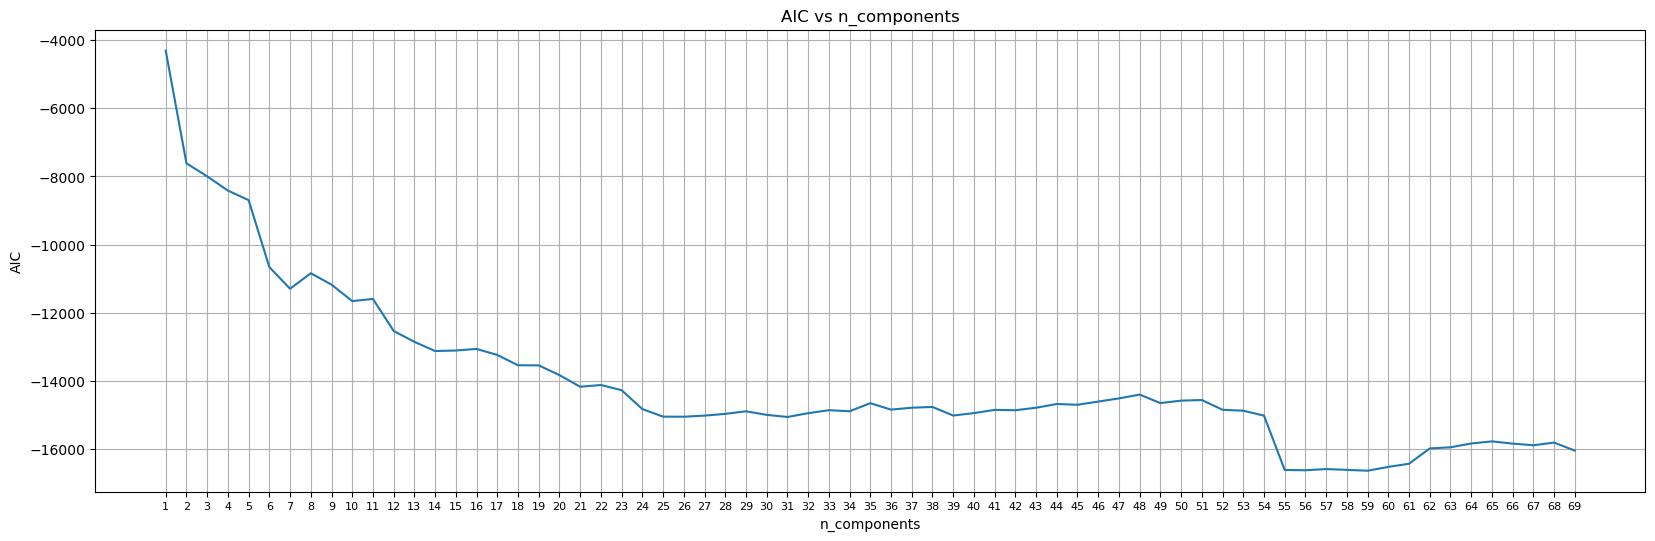

In [ ]:
n_components = np.arange(1,70)
models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(data_norm) for n in n_components]
AICS = [m.aic(data_norm) for m in models]


plt.figure(figsize=(20, 6))
plt.title('AIC vs n_components')
plt.plot(n_components, AICS)
plt.xticks(n_components,size=8)
plt.grid(True)
plt.xlabel('n_components');
plt.ylabel('AIC')

In [24]:
aics = np.asarray([m.aic(data_norm) for m in models])
kmin = np.where(aics == np.amin(aics))[0][0]
print(kmin)

58


In [25]:
#59

clusters_dbscan = pd.DataFrame()
df_clusters_dbscan = data_non_scaled.copy()  # Copia el dataframe original para agregar los clusters
for n in n_dbscan:
    dbscan = DBSCAN(eps=n)
    model = dbscan.fit(data_norm)
    clusters_dbscan['cluster_' + str(n)] = model.labels_
    score_dbscan = silhouette_score(data_norm, model.labels_)
    print(f'DBSCAN with {n}: Silhouette Score = {score_dbscan:.3f}')
    df_clusters_dbscan['cluster_' + str(n)] = kmeans.labels_  # Agrega los clusters al dataframe original


DBSCAN with 0.38: Silhouette Score = 0.505
DBSCAN with 0.39: Silhouette Score = 0.505
DBSCAN with 0.4: Silhouette Score = 0.505
DBSCAN with 0.41: Silhouette Score = 0.505
DBSCAN with 0.42: Silhouette Score = 0.505
DBSCAN with 0.43: Silhouette Score = 0.524
DBSCAN with 0.44: Silhouette Score = 0.524
DBSCAN with 0.45: Silhouette Score = 0.542
DBSCAN with 0.46: Silhouette Score = 0.556
DBSCAN with 0.47: Silhouette Score = 0.566
DBSCAN with 0.48: Silhouette Score = 0.577
DBSCAN with 0.49: Silhouette Score = 0.577
DBSCAN with 0.5: Silhouette Score = 0.577
DBSCAN with 0.51: Silhouette Score = 0.577
DBSCAN with 0.52: Silhouette Score = 0.577
DBSCAN with 0.53: Silhouette Score = 0.577
DBSCAN with 0.54: Silhouette Score = 0.577
DBSCAN with 0.55: Silhouette Score = 0.577
DBSCAN with 0.56: Silhouette Score = 0.587
DBSCAN with 0.57: Silhouette Score = 0.587
DBSCAN with 0.58: Silhouette Score = 0.583
DBSCAN with 0.59: Silhouette Score = 0.583
DBSCAN with 0.6: Silhouette Score = 0.583


In [26]:
clusters_gmm = pd.DataFrame()
df_clusters_gmm = data_non_scaled.copy() 
gmm = GaussianMixture(kmin+1, covariance_type='full')
model = gmm.fit(data_norm)
model.predict(data_norm)
clusters_gmm['cluster'] = model.predict(data_norm)
df_clusters_gmm['cluster'] = model.predict(data_norm)
print(df_clusters_gmm.value_counts('cluster').sort_index())

score_gmm = silhouette_score(data_norm, clusters_gmm)
print(score_gmm)

cluster
0     17
1     12
2     14
3      8
4      2
5      1
6      1
7      3
8      1
9      7
10    10
11    14
12     4
13     1
14     1
15    11
16     5
17    25
18     2
19     8
20    15
21     1
22     1
23     9
24     1
25     1
26     7
27     2
28     2
29     4
30     2
31     1
32     4
33     1
34     1
35     1
36     1
37     1
38     4
39     2
40    10
41     3
42     1
43     2
44     1
45     5
46    24
47    17
48     1
49     1
50     4
51    13
52     2
53     3
54    10
55     1
56     1
57     5
58    11
Name: count, dtype: int64
0.19286206425308974


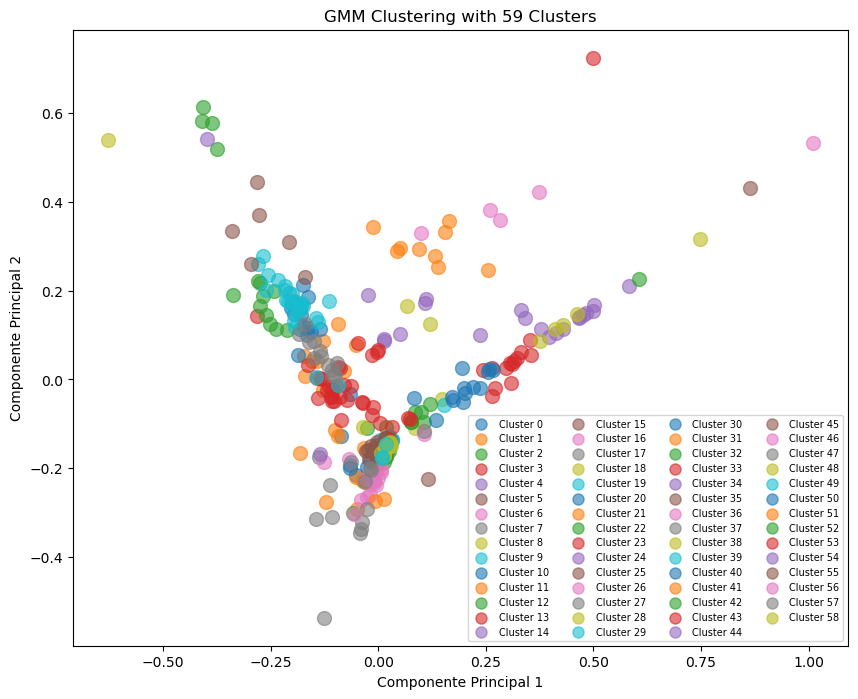

In [27]:
gmm = GaussianMixture(n_components=kmin + 1, covariance_type='full')
model = gmm.fit(data_norm)
clusters_gmm = model.predict(data_norm)

df_clusters_gmm = data_non_scaled.assign(cluster=clusters_gmm)

plt.figure(figsize=(10, 8))

for j in np.unique(clusters_gmm):
    plt.scatter(pc1[clusters_gmm == j], pc2[clusters_gmm == j], label=f'Cluster {j}', alpha=0.6, s=100)

plt.title(f'GMM Clustering with {kmin + 1} Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(loc='lower right', fontsize=7, markerscale=0.8, ncol=4)

plt.show()